In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import warnings
import itertools
import plotly.graph_objects as go
from tabulate import tabulate
from prettytable import PrettyTable 
from itertools import product  
from tqdm import tqdm_notebook
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from fbprophet import Prophet
from IPython import display
import matplotlib.ticker as ticker
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers, backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



# Giới thiệu


Dự báo chuỗi thời gian là một lớp mô hình quan trọng trong thống kê, kinh tế lượng và machine learning. Sở dĩ chúng ta gọi lớp mô hình này là chuỗi thời gian (time series) là vì mô hình được áp dụng trên các chuỗi đặc thù có yếu tố thời gian. Một mô hình chuỗi thời gian thường dự báo dựa trên giả định rằng các qui luật trong quá khứ sẽ lặp lại ở tương lai. Do đó xây dựng mô hình chuỗi thời gian là chúng ta đang mô hình hóa mối quan hệ trong quá khứ giữa biến độc lập (biến đầu vào) và biến phụ thuộc (biến mục tiêu). Dựa vào mối quan hệ này để dự đoán giá trị trong tương lai của biến phụ thuộc. Sau đây là một số thuật toán dùng để dự đoán chuỗi thời gian dựa trên các giá trị được học trước đó


# ARIMA


Mô hình ARIMA: Dựa trên giả thuyết chuỗi dừng và phương sai sai số không đổi. Mô hình sử dụng đầu vào chính là những tín hiệu quá khứ của chuỗi được dự báo để dự báo nó. Các tín hiệu đó bao gồm: chuỗi tự hồi qui AR (auto regression) và chuỗi trung bình trượt MA (moving average). Hầu hết các chuỗi thời gian sẽ có xu hướng tăng hoặc giảm theo thời gian, do đó yếu tố chuỗi dừng thường không đạt được. Trong trường hợp chuỗi không dừng thì ta sẽ cần biến đổi sang chuỗi dừng bằng sai phân. Khi đó tham số đặc trưng của mô hình sẽ có thêm thành phần bậc của sai phân d và mô hình được đặc tả bởi 3 tham số ARIMA(p, d, q).

Mô hình SARIMA: Về bản chất đây là mô hình ARIMA nhưng được điều chỉnh đặc biệt để áp dụng cho những chuỗi thời gian có yếu tố mùa vụ. Như chúng ta đã biết về bản chất ARIMA chính là mô hình hồi qui tuyến tính nhưng mối quan hệ tuyến tính thường không giải thích tốt chuỗi trong trường hợp chuỗi xuất hiện yếu tố mùa vụ. Chính vì thế, bằng cách tìm ra chu kì của qui luật mùa vụ và loại bỏ nó khỏi chuỗi ta sẽ dễ dàng hồi qui mô hình theo phương pháp ARIMA.

Mô hình ARIMAX: Là một dạng mở rộng của model ARIMA. Mô hình cũng dựa trên giải định về mối quan hệ tuyến tính giữa giá trị và phương sai trong quá khứ với giá trị hiện tại và sử dụng phương trình hồi qui tuyến tính được suy ra từ mối quan hệ trong quá khứ nhằm dự báo tương lai. Mô hình sẽ có thêm một vài biến độc lập khác và cũng được xem như một mô hình hồi qui động (hoặc một số tài liệu tiếng việt gọi là mô hình hồi qui động thái). Về bản chất ARIMAX tương ứng với một mô hình hồi qui đa biến nhưng chiếm lợi thế trong dự báo nhờ xem xét đến yếu tố tự tương quan được biểu diễn trong phần dư của mô hình. Nhờ đó cải thiện độ chính xác.

Xuất ra dữ liệu được dùng để dự đoán:

         Date   Open   High    Low  Close  Adj Close      Volume
0  31/12/2020  17.00  17.00  16.75  16.90      16.90  14.969.830
1  30/12/2020  17.00  17.25  16.80  16.80      16.80  37.054.500
2  29/12/2020  16.75  16.90  16.60  16.70      16.70  40.606.710
3  28/12/2020  17.05  17.10  16.55  16.75      16.75  23.689.440
4  25/12/2020  16.50  16.95  16.25  16.95      16.95  20.824.680
              Open         High          Low        Close    Adj Close
count  2494.000000  2494.000000  2494.000000  2494.000000  2494.000000
mean     14.818677    15.012875    14.649860    14.837694    12.553360
std       4.097697     4.132891     4.067873     4.118398     2.491815
min       7.200000     7.540000     7.120000     7.300000     6.840000
25%      11.450000    11.600000    11.300000    11.412500    10.750000
50%      13.700000    13.900000    13.500000    13.700000    12.450000
75%      18.300000    18.500000    18.100000    18.400000    14.600000
max      26.900000    26.900000    25.5000

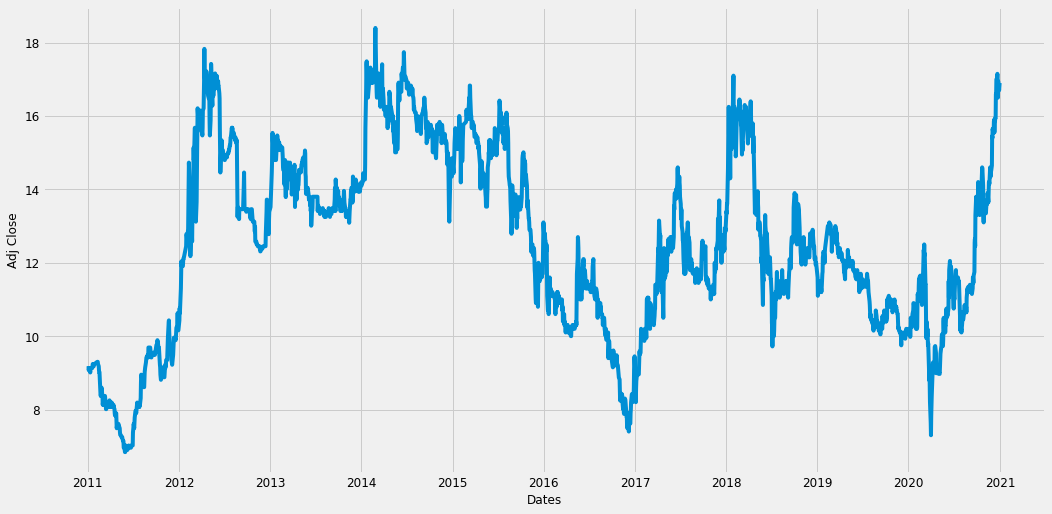

In [60]:
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')


data = pd.read_csv('dulieu5.csv')

# print whole sheet data

print(data.head(5))

print(data.describe())

print(data['Date'])

data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

print(data.dtypes)

data.set_index('Date',inplace=True)

data['Date'] = data.index


col_names = data.columns

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Close')
plt.plot(data['Adj Close'])
plt.show()

Date
2011-01-31     9.154211
2011-02-28     8.856000
2011-03-31     8.163913
2011-04-30     7.924737
2011-05-31     7.230000
                ...    
2020-08-31    10.833333
2020-09-30    11.964286
2020-10-31    13.768182
2020-11-30    13.954762
2020-12-31    16.273913
Freq: M, Name: Adj Close, Length: 120, dtype: float64


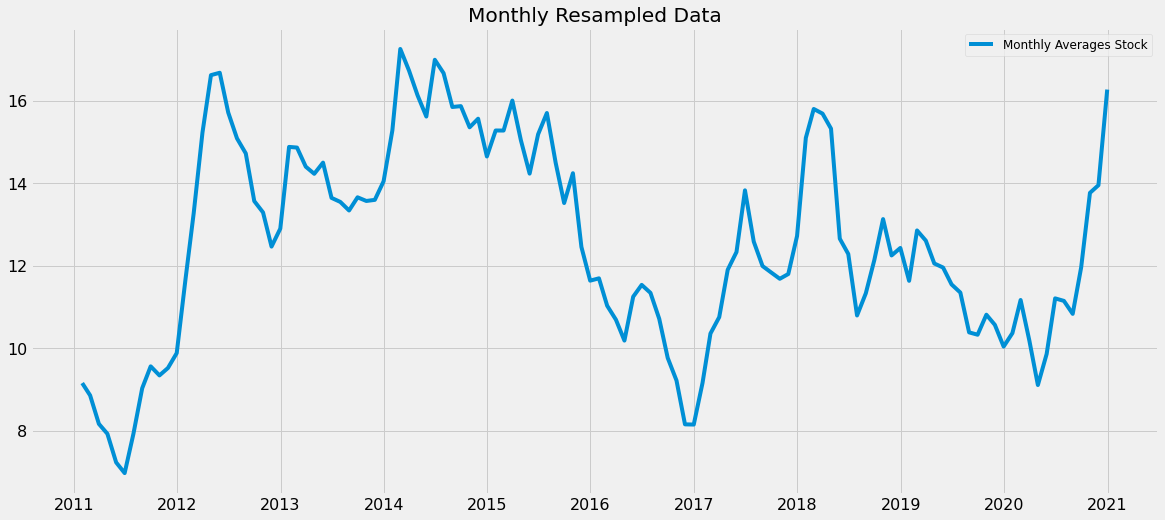

In [61]:
#Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)

#Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

monthly_data = monthly_mean.to_frame()

print(monthly_data['Adj Close'])

#Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

Data Describtion :-

Date : Date of trading

Open : Price at which security first trades

High : Highest Price of the trading day

Low : Lowest Price of the trading day

Close : Last Price the stock traded during the trading day

Adj Close : Price that is adjusts Coroporate Actions on Closing Price

Volume : Number of Shares that changed hands during the trading day

In [62]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter

ARIMA model là viết tắt của cụm từ Autoregressive Intergrated Moving Average. Mô hình sẽ biểu diễn phương trình hồi qui tuyến tính đa biến (multiple linear regression) của các biến đầu vào (còn gọi là biến phụ thuộc trong thống kê) là 3 thành phần chính:

+ Auto regression: Kí hiệu là AR. Đây là thành phần tự hồi quy bao gồm tập hợp các độ trễ của biến hiện tại.  Độ trễ bậc p chính là giá trị lùi về quá khứ p bước thời gian của chuỗi. Độ trễ dài hoặc ngắn trong quá trình AR phụ thuộc vào tham số trễ p. Trong dữ liệu dãy số thời gian sẽ có một số mối quan hệ tìm ẩn nào đó. Ví dụ như mối quan hệ tương quan như vậy được gọi là Autocorrelation. Để phân tích mối quan hệ đặc biệt này ta sẽ sử dụng phương pháp "lagged series", tức giá trị ở mốc thời gian trước sẽ được dời lên n bậc.

+ Moving average: Qúa trình trung bình trượt được hiểu là quá trình dịch chuyển hoặc thay đổi giá trị trung bình của chuổi theo thời gian. Mục đích chính sử dụng Moving average là loại bỏ các yếu tố ngẫu nhiên, yếu tố nhiễu, bất thường không kiểm soát, có thể tác động lên kết quả dự báo giúp quy trình dự báo trở nên dễ dàng và hiệu quả hơn. Trong mô hình Arima, MA đóng vai trò như là công cụ sẽ truy suất các thông tin về sai số dự báo ở các mốc thời điểm trong quá khứ sẽ ảnh hưởng thế nào đến sau số dự báo ở mốc thời gian trong tương lai

+ Intergrated: Là quá trình đồng tích hợp hoặc lấy sai phân. Yêu cầu chung của các thuật toán trong time series là chuỗi phải đảm bảo tính dừng. Hầu hết các chuỗi đều tăng hoặc giảm theo thời gian. Do đó yếu tố tương quan giữa chúng chưa chắc là thực sự mà là do chúng cùng tương quan theo thời gian. Khi biến đổi sang chuỗi dừng, các nhân tố ảnh hưởng thời gian được loại bỏ và chuỗi sẽ dễ dự báo hơn. Để tạo thành chuỗi dừng, một phương pháp đơn giản nhất là chúng ta sẽ lấy sai phân.

Như vậy về tổng quát thì ARIMA là mô hình kết hợp của 2 quá trình tự hồi qui và trung bình trượt. Dữ liệu trong quá khứ sẽ được sử dụng để dự báo dữ liệu trong tương lai. 

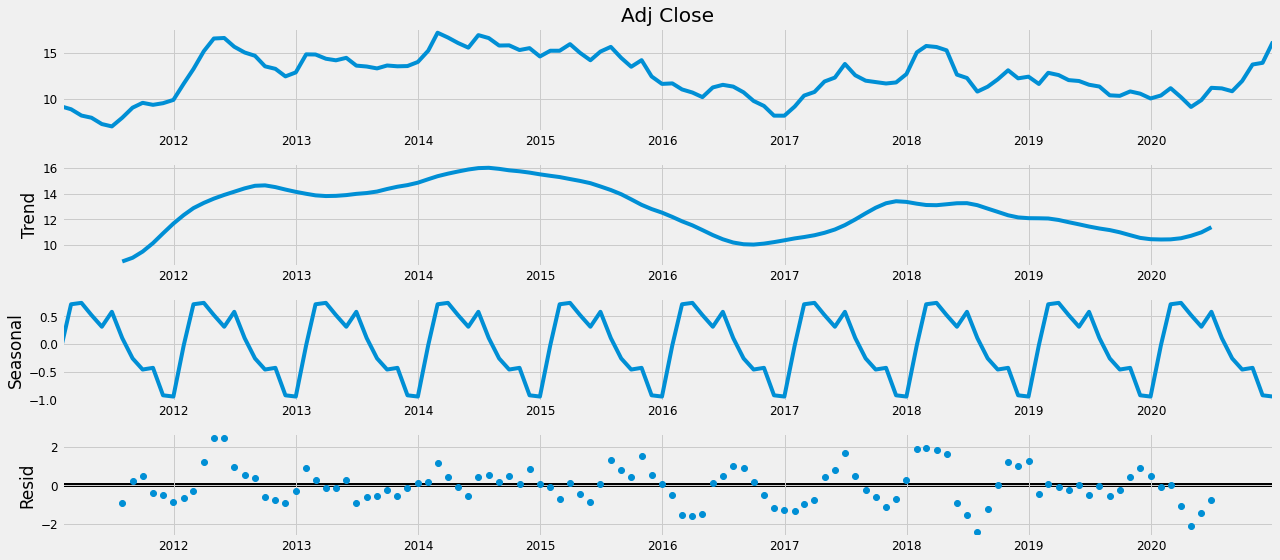

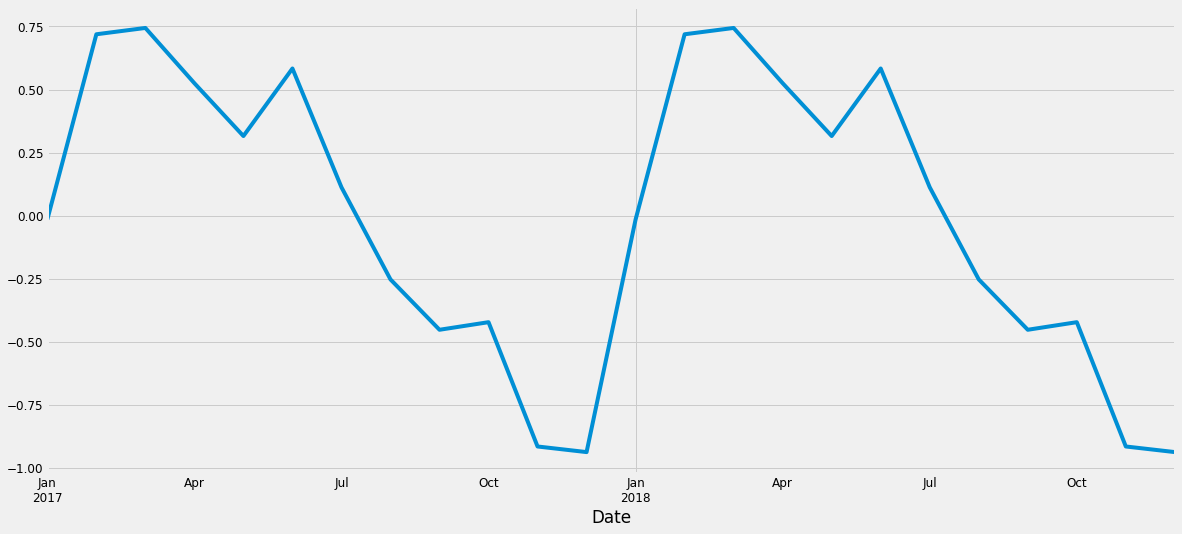

In [63]:
rcParams['figure.figsize'] = 18, 8
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()

plt.show()
decomposed_series.seasonal['2017':'2018'].plot()

plt.show()

từ đồ thị trên ta thấy:
- Tính xu hướng: Không có tính xu hướng rõ ràng, dữ liệu lúc lên lúc xuống và khá khó đoán trước được
- Tính thời vụ: Ta thấy chuỗi có chu kì 1 năm. Dữ liệu có tính thời vụ, giá cổ phiếu giảm vào những tháng gần cuối năm và tăng dần từ tháng cuối năm đến các tháng đầu năm, sau đó giảm dần.

Do dữ liệu có tính thời vụ nên ta sẽ dùng mô hình sarima để dự đoán

Tự tương quan (ACF - AutoCorrelation Function): Tự tương quan là một khái niệm quan trọng trong chuỗi thời gian. Hầu hết các chuỗi thời gian sẽ có sự tương quan với giá trị trễ của nó và các giá trị càng gần nhau thì tương quan càng mạnh hoặc các giá trị cùng thuộc 1 chu kì của chuỗi thì sẽ có tương quan cao (chẳng hạn như cùng tháng trong chu kì năm hay cùng quí trong chu kì năm). Chính vì vậy hệ số này mới có tên là tự tương quan. Hệ số tự tương quan được viết tắt là ACF và thường dùng để tìm ra độ trễ của quá trình trung bình trượt  để xây dựng các mô hình như ARIMA, GARCH, ARIMAX,… và kiểm tra yếu tố mùa vụ

Text(0.5, 0, 'Lags')

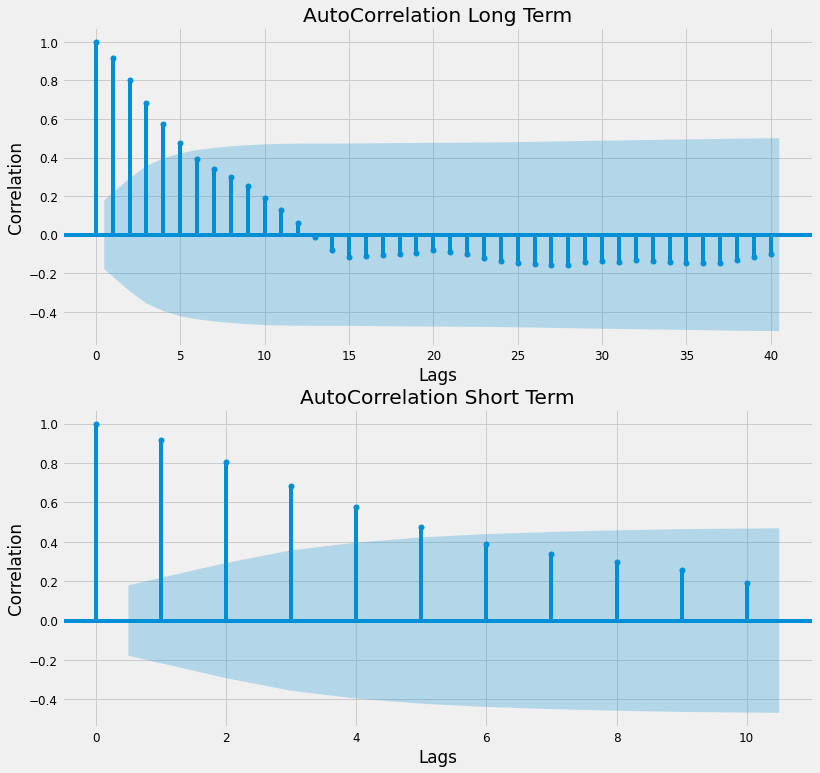

In [64]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=40,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=10,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

- Trục hoành là độ trễ, trục tung là giá trị của hệ số tự tương quan tương ứng với độ trễ. Dải màu hồng chính là khoảng tin cậy 95% để giá trị hệ số tự tương quan bằng 0. 
- Sự suy giảm chậm của các giá trị tương quan chỉ ra rằng các giá trị trong tương lai phụ thuộc nhiều vào các giá trị bị trễ. Điều này cho thấy chuỗi không phải là ngẫu nhiên và không phải là chuỗi cố định

Tự tương quan riêng phần (PACF - Partitial AutoCorrelation Function): Về cơ bản tương quan riêng phần cũng là chỉ số đo lường hệ số tương quan như ACF. Tập trung tìm hiểu mối quan hệ trực tiếp giữa quan sát hiện tại với các quan sát trong quá khứ, mà bỏ qua các mối quan hệ trung gian 

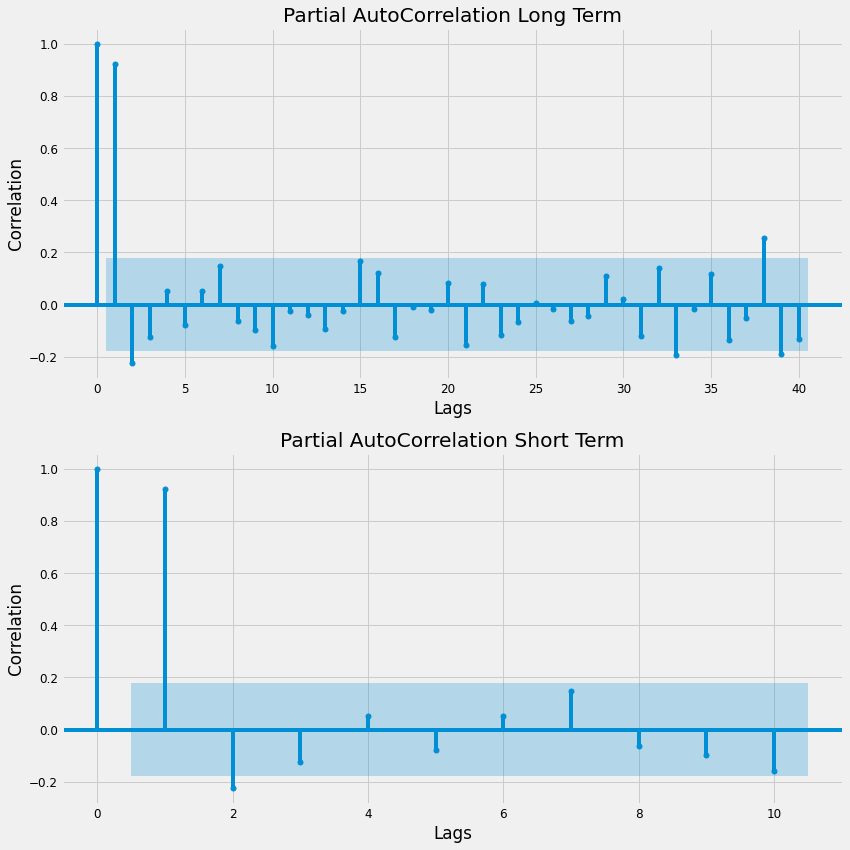

In [65]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
pacf = plot_pacf(monthly_data['Adj Close'],lags=40,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=10,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

plt.show()

Sử dụng kiểm định Dickey-fuller để kiểm tra tính dừng. Nếu giá trị p-value lớn hơn mức ý nghĩa, mặc định là 0.05 thì ta bác bỏ giả thuyết dữ liệu có tính dừng và ngược lại, nếu p-value nhỏ hơn 0.05 thì ta có thể kết luận dữ liệu đã có tính dừng

In [66]:
def tsplot(y, lags=None, figsize=(14, 8), stle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
      print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

+ Trước khi lấy sai phân
ADF Statistic: -2.696955
p-value: 0.074567
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580
Failed to Reject Ho-Time Series is Non-Stationary
+ Sau khi lấy sai phân bậc một
ADF Statistic: -5.202717
p-value: 0.000009
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581
Reject Null Hypothesis(Ho)-Time Series is Stationary


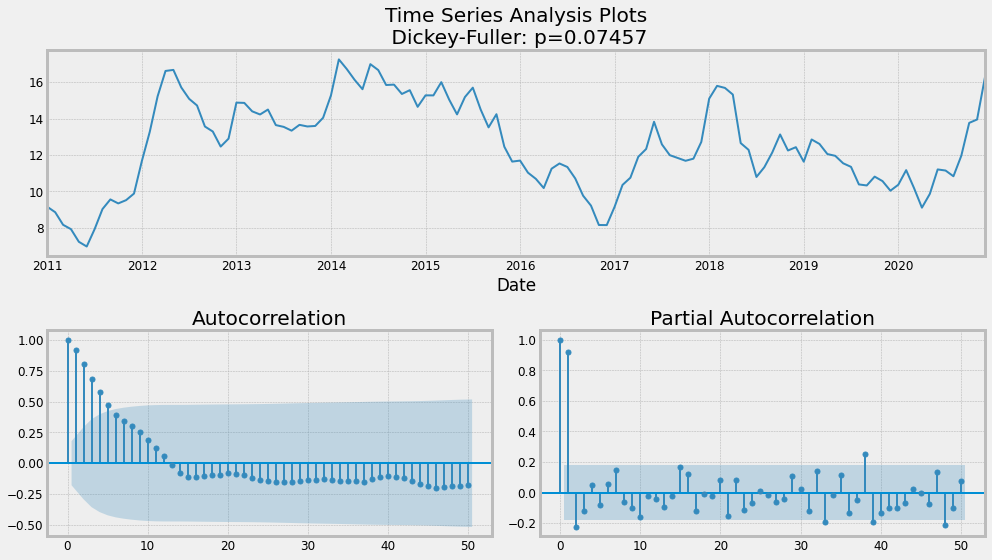

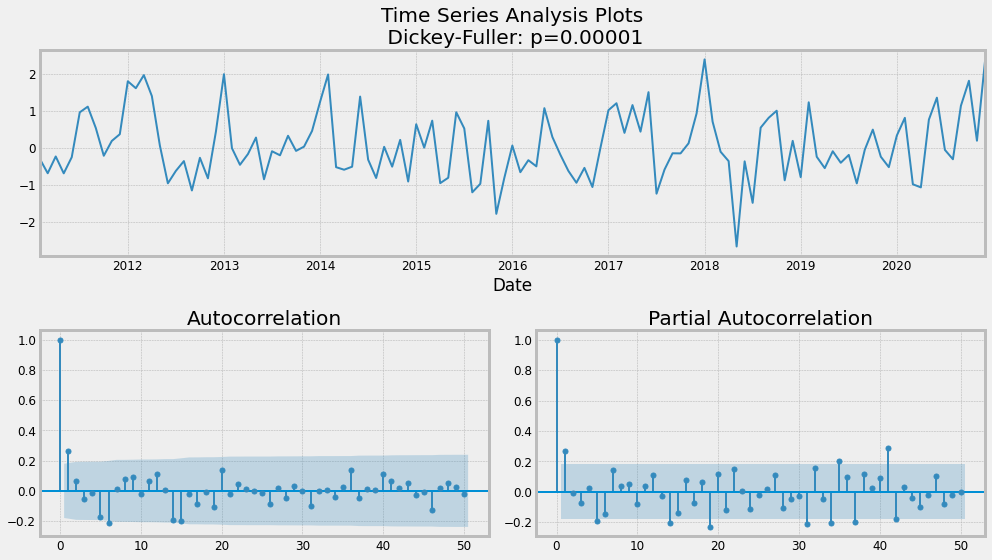

In [67]:
print("+ Trước khi lấy sai phân")
ad_fuller_func(monthly_data['Adj Close'])
tsplot(monthly_data['Adj Close'], lags=50)

#lay sai phan
print("+ Sau khi lấy sai phân bậc một")
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)
ad_fuller_func(monthly_diff[1:])
tsplot(monthly_diff[1:], lags=50)

plt.show()

In [68]:
modelling_series = monthly_data['Adj Close']


In [69]:
train,test = split(modelling_series,train_size=0.75,shuffle=False)

print(train)
print(test)

print('Train',len(train))
print('Test',len(test))

Date
2011-01-31     9.154211
2011-02-28     8.856000
2011-03-31     8.163913
2011-04-30     7.924737
2011-05-31     7.230000
                ...    
2018-02-28    15.803333
2018-03-31    15.690909
2018-04-30    15.326316
2018-05-31    12.656818
2018-06-30    12.285714
Freq: M, Name: Adj Close, Length: 90, dtype: float64
Date
2018-07-31    10.794091
2018-08-31    11.332609
2018-09-30    12.136842
2018-10-31    13.132609
2018-11-30    12.250000
2018-12-31    12.432500
2019-01-31    11.634091
2019-02-28    12.856667
2019-03-31    12.609524
2019-04-30    12.055263
2019-05-31    11.956818
2019-06-30    11.547500
2019-07-31    11.350000
2019-08-31    10.384091
2019-09-30    10.327500
2019-10-31    10.813043
2019-11-30    10.566667
2019-12-31    10.039545
2020-01-31    10.366471
2020-02-29    11.170000
2020-03-31    10.180455
2020-04-30     9.106500
2020-05-31     9.861500
2020-06-30    11.209091
2020-07-31    11.147826
2020-08-31    10.833333
2020-09-30    11.964286
2020-10-31    13.768182
2

Dưới đây là hàm để chọn ra mô hình sarima tốt nhất dựa trên chỉ số AIC(Akaike Information Criteria), một trong những tiêu chí thường được sử dụng để lựa chọn mô hình Arima với p,d,q tối ưu nhất. Tiêu chí thông tin này là một công cụ ước tính lỗi dự báo và do đó đánh giá chất lượng tương đối của các mô hình thống kê trên một tập hợp dữ liệu nhất định. Gỉa sử có một tập hợp các mô hình được xây dựng trên cùng một bộ dữ liệu, AIC ước tính chất lượng của từng mô hình trong mối liên quan đến từng mô hình khác. Do đó, AIC cung cấp một phương tiện để lựa chọn mô hình. AIC được hình thành dựa trên lý thuyết thông tin (information theory). Khi một mô hình thống kê được sử dụng để dự báo, kết quả sẽ gần như không bao giờ chính xác hoàn toàn. Vì vậy một số thông tin sẽ bị mất do không thể dự báo từ mô hình. AIC ước tính lượng thông tin tương đối bị mất bởi một mô hình nhất định: mô hình mất càng ít thông tin thì chất lượng của mô hình đó càng cao. Vì vậy mô hình nào có AIC càng thấp thì càng tốt. Dưới đây là hàm chọn ra mô hình Sarima tốt nhất.

In [19]:
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit(disp=-1)
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

sarima_grid_search(train,12)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:713.7312468610816
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:558.2332549175668
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:2788.7768958134857
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:414.04332250511743
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:315.35069586825665
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2283.829960149403
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:393.0359571590189
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:295.9514011909449
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:239.65206975181118
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:420.7794909438948
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:404.8443432035173
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:2439.493162945685
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:323.23063946723715
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:319.2191479466425
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:2253.0674268045946
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:304.1503623167705
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:291.8610443757085
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:225.79001694592606
SARIMA(0, 0, 0)x(2, 0

SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:179.93232914782544
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:139.5296398223894
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:171.9496161389176
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:173.0184234651081
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1900.8439589602829
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:150.6426316013951
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:149.49521828541873
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:137.09437907901116
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:140.27186535741387
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:141.34246072537272
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:124.18325771952591
SARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:258.0003690575851
SARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:229.60036535298804
SARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:2417.3690023026866
SARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:261.1001359870246
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:201.83949913104203
SARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:2367.0937171967416
SARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:285.8813617794706
SARIMA(0, 2, 0)x(

SARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:171.1987955687652
SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:2173.3589914960958
SARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:247.8903339286688
SARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:175.87904890718403
SARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:133.42948127167503
SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:207.66172401920352
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:198.15445835298365
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:2560.5876865049922
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:191.09166669407324
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:173.1988140050875
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:2104.248441075974
SARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:198.5192680853365
SARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:181.52721224877348
SARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:142.04561736177232
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:173.4555776488849
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:174.62458221016348
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:2461.2283692221463
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:150.62241204552143
SARIMA(1, 0, 2)x

SARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC:172.81965633548992
SARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC:2714.575431570769
SARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:146.05093959976315
SARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:147.46848880691036
SARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:140.06320778730395
SARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:134.11439394517862
SARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:135.07983781447476
SARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:129.68975348027246
SARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:228.51880243728976
SARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:195.39798552874475
SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:2396.428598612628
SARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:237.49617807823884
SARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:172.57884051704758
SARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:2461.548794904935
SARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:253.29663723637358
SARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:173.8689833717934
SARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:132.26575281453717
SARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:208.38721644139463
SARIMA(1, 2, 2

SARIMA(2, 1, 1)x(0, 2, 2, 12) - AIC:134.8393081303027
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:196.54390337848778
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:196.64011912570126
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:2264.962168998066
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:189.16554593669127
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:176.6523333510659
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:2287.841763649313
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:193.35467381942877
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:184.44355714879183
SARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:143.15092043425483
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:170.71884544491073
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:170.4924967029257
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:16.0
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:143.3176227692977
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:141.43838755132745
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:141.09038386268526
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:128.9641088219753
SARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:129.0167151427474
SARIMA(2, 1, 1)x(2, 2, 2, 12) - 

In [70]:
model = sm.tsa.SARIMAX(train,order=(2,1,1),seasonal_order=(0,0,2,12))
results=model.fit(disp=-1)
forecasts_train = results.predict(start='2011-01-31',end='2018-06-30')
forecasts_test = results.predict(start='2018-07-31',end='2020-12-31')
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Adj Close   No. Observations:                   90
Model:             SARIMAX(2, 1, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -109.818
Date:                                 Sat, 14 Aug 2021   AIC                            231.637
Time:                                         13:40:04   BIC                            246.569
Sample:                                     01-31-2011   HQIC                           237.655
                                          - 06-30-2018                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1123      3.170     -0.035      0.972      -6.326       6

Bảng trên chính là summary kết quả từ mô hình SARIMA.
- Cột coef là giá trị hệ số ước lượng từ mô hình tương ứng với các biến ở cột bên tay trái.
- Cột std err là độ lệch chuẩn của hệ số ước lượng. Từ giá trị ước lượng và độ lệch chuẩn ta có thể tính toán ra được khoảng tin cậy. Cận trên và dưới của khoảng tin cậy là các cột [0.025 và 0.975].
- Cột z chính là giá trị ngưỡng tới hạn được suy ra từ phân phối chuẩn hóa. 
- Cột P>|z| chính là giá trị P-value của cặp giả thuyết dấu bằng. Gía trị của P-value < 0.05 sẽ cho thấy hệ số ước lượng lớn hơn 0 là có ý nghĩa thống kê.

Các chỉ số ở góc trên bên phải lần lượt là:
- No. Observations: Số lượng quan sát
- Log Likelihood: Gía trị hàm logarit ước lượng hợp lý tối đa.
- AIC: Chỉ số Akaike Information Criteria
- BIC: Chỉ số Bayesian Information Criteria. Chỉ số này cũng có chức năng đo lường sai số của mô hình như AIC nhưng theo trường phái thống kê suy diễn (statistical inference).

Chúng ta biết rằng một mô hình có thể fit với tập huấn luyện nhưng chưa chắc đã tốt khi dự báo. Chính vì thế cần kiểm tra chất lượng của mô hình trên tập dự báo. Trong mô hình phân loại chúng ta thường quan tâm đến tỷ lệ chính xác accuracy, trong trường hợp mẫu mất cân bằng thì precision, recall, f1 là những chỉ số đo lường độ chính xác khác được thay thế. Tuy nhiên với lớp mô hình dự báo thì sẽ sử dụng một tập hợp các tham số khác liên quan đến đo lường sai số giữa giá trị dự báo và giá trị thực tế. Đó là các chỉ số:

- MSE (mean square error): Trung bình tổng bình phương sai số.
- RMSE (root mean square error): Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế.
- MAE (mean absolute error): Trung bình trị tuyệt đối sai số. Chính là khoảng cách theo norm chuẩn bậc 1 giữa giá trị dự báo và giá trị thực tế. Dành cho bạn nếu chưa biết về norm chuẩn bậc 1 hoặc L1 norm.
- MAPE (mean absolute percentage error): Trung bình phần trăm trị tuyệt đối sai số. Chỉ số này cho biết giá trị dự báo sai lệch bao nhiêu phần trăm so với giá trị thực tế. Lưu ý ta chỉ tính được chỉ số này chỉ khi giá trị thực tế đều khác 0.
- Accuracy: Thước đo độ chính xác của thuật toán

In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('Mean Square Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Root Mean Squared Error : ',math.sqrt(round(mean_squared_error(test_series,forecast_series),3)))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  print('Mean Absolute Percentage Error',round(mean_absolute_percentage_error(test_series,forecast_series),3))
  list_result_metrics = []
  list_result_metrics.extend([round(mean_squared_error(test_series,forecast_series),3),math.sqrt(round(mean_squared_error(test_series,forecast_series),3)),round(mean_absolute_error(test_series,forecast_series),3),round(mean_absolute_percentage_error(test_series,forecast_series),3)])
  return list_result_metrics

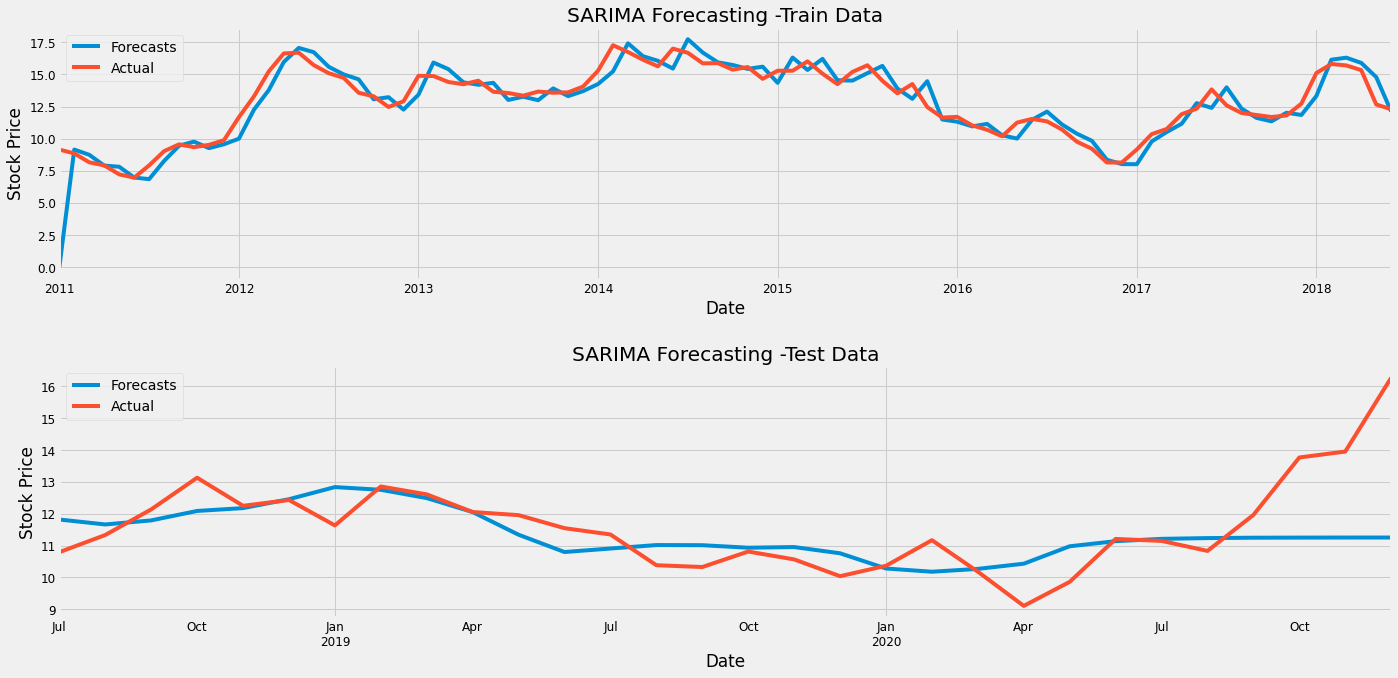

In [72]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(20,10))
forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')
forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)
plt.show()

In [73]:
# print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
result_metrics_sarima = result_metrics(test,forecasts_test,'SARIMA-Test Data')

----
Result Metrics for SARIMA-Test Data
Mean Square Error :  1.669
Root Mean Squared Error :  1.2918978287774927
Mean Absolute Error :  0.791
Mean Absolute Percentage Error 6.405


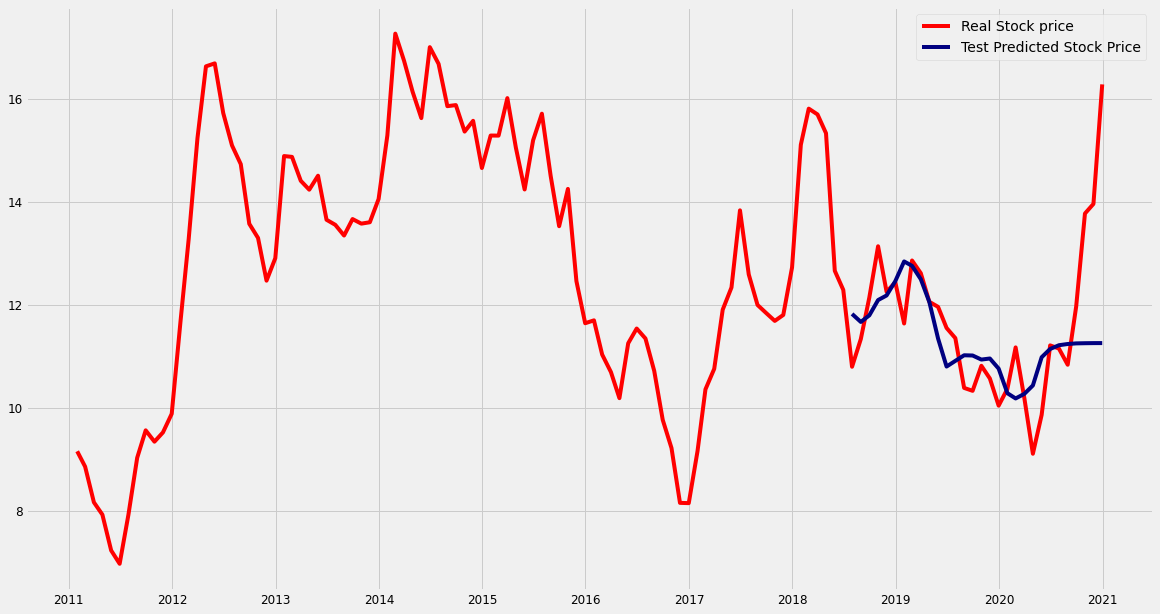

In [74]:
plt.figure(figsize=(18,10))
# plt.plot(train.index, train, color='yellow', label = 'Train Stock price')
plt.plot(modelling_series.index, modelling_series, color='red', label = 'Real Stock price')
# plt.plot(test.index, test, color='red', label='Real Stock Price')
plt.plot(test.index, forecasts_test, color='navy', label='Test Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


In [75]:
smoothing_data = monthly_data


# PROPHET 


Prophet cũng áp đặt điều kiện nghiêm ngặt rằng các cột đầu vào phải được đặt tên là ds (cột thời gian) và y (cột số liệu), vì vậy hãy đổi tên các cột trong DataFrame :

In [76]:
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index

prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)
print(prophet_data)

                   ds          y
Date                            
2011-01-31 2011-01-31   9.154211
2011-02-28 2011-02-28   8.856000
2011-03-31 2011-03-31   8.163913
2011-04-30 2011-04-30   7.924737
2011-05-31 2011-05-31   7.230000
...               ...        ...
2020-08-31 2020-08-31  10.833333
2020-09-30 2020-09-30  11.964286
2020-10-31 2020-10-31  13.768182
2020-11-30 2020-11-30  13.954762
2020-12-31 2020-12-31  16.273913

[120 rows x 2 columns]


In [77]:
prophet_train,prophet_test = split(prophet_data,train_size=0.75,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 90
Testing Data Size : 30


Trong đoạn mã ở trên, ta đã hướng dẫn Prophet tạo 30 dấu dữ liệu trong tương lai.

Khi làm việc với Prophet, điều quan trọng là phải xem xét tần suất của chuỗi thời gian của ta . Bởi vì ta đang làm việc với dữ liệu hàng tháng, ta đã chỉ định rõ ràng tần suất mong muốn của dấu thời gian (trong trường hợp này, M là cuối tháng). Do đó, make_future_dataframe tạo ra 30 dấu thời gian hàng tháng cho ta . Nói cách khác, ta đang tìm cách dự đoán các giá trị tương lai của chuỗi thời gian của ta trong 30 tháng tới.

In [78]:
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

future= prophet_model.make_future_dataframe(periods=30,freq='M')

print(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2011-01-31
1   2011-02-28
2   2011-03-31
3   2011-04-30
4   2011-05-31
..         ...
115 2020-08-31
116 2020-09-30
117 2020-10-31
118 2020-11-30
119 2020-12-31

[120 rows x 1 columns]


In [79]:
forecast=prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2020-08-31,10.487310,7.669134,13.225248
116,2020-09-30,10.021745,7.283675,12.786944
117,2020-10-31,9.784828,7.229910,12.322890
118,2020-11-30,9.371860,6.707294,11.886458
119,2020-12-31,9.723821,7.076950,12.470846


Prophet trả về một DataFrame lớn với nhiều cột thú vị, nhưng ta đặt kết quả của bạn cho các cột phù hợp nhất với dự báo, đó là:

ds : dấu dữ liệu của giá trị dự báo
yhat : giá trị dự báo của chỉ số của ta (trong Thống kê, yhat là ký hiệu thường được sử dụng để biểu thị các giá trị dự đoán của một giá trị y )
yhat_lower : giới hạn dưới của dự báo của ta
yhat_upper : giới hạn trên của dự báo của ta

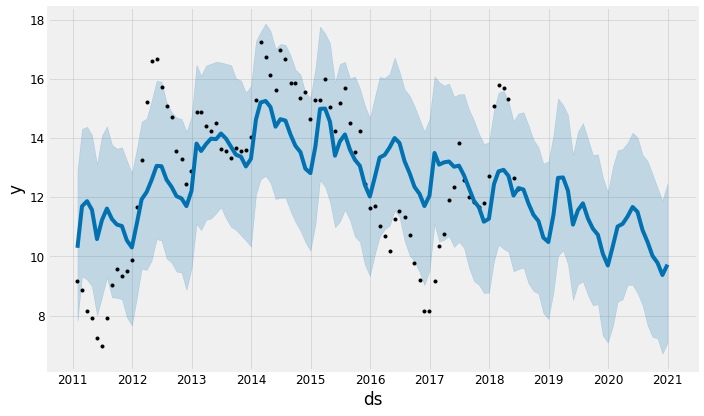

In [80]:
fig1 = prophet_model.plot(forecast)

Prophet vẽ biểu đồ các giá trị quan sát được của chuỗi thời gian của ta (các chấm đen), các giá trị dự báo (đường màu xanh lam) và khoảng thời gian không chắc chắn của các dự báo của ta (các vùng tô bóng màu xanh lam).

Một tính năng đặc biệt mạnh mẽ khác của Prophet là khả năng trả về các thành phần của dự báo của ta . Điều này có thể giúp tiết lộ cách hàng ngày, hàng tuần và hàng năm của chuỗi thời gian đóng góp vào các giá trị dự báo tổng thể:

Một tính năng mạnh mẽ của thuật toán prophet là trả về các thành phần của dự báo. Điều này giúp tiết lộ các mẫu chuỗi thời gian hằng năm đóng góp như thế nào vào các giá trị dự báo tổng thể

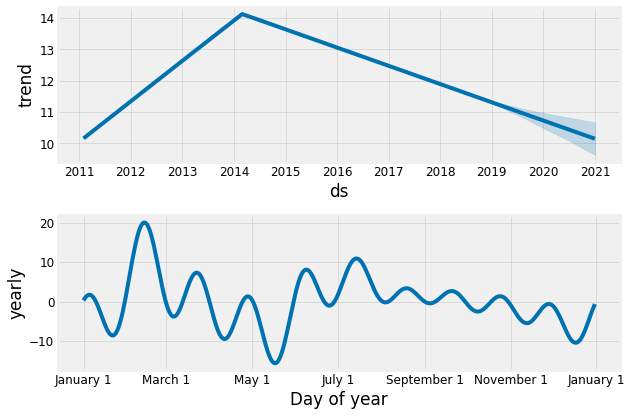

In [81]:
fig2 = prophet_model.plot_components(forecast)

Biểu đồ trên cung cấp 1 số thông tin thú vị. Biểu đồ thứ nhất cho thấy giá cổ phiểu tăng dần và đạt đỉnh từ 2011-2014 sau đó giảm dần từ 2014-2020 theo dự báo của prophet. Biểu đồ thứ hai cho thấy giá trị cổ phiểu đạt cao nhất vào khoảng tháng 2 và tháng 3, thấp nhất vào khoảng giữa tháng 5 và tháng 6

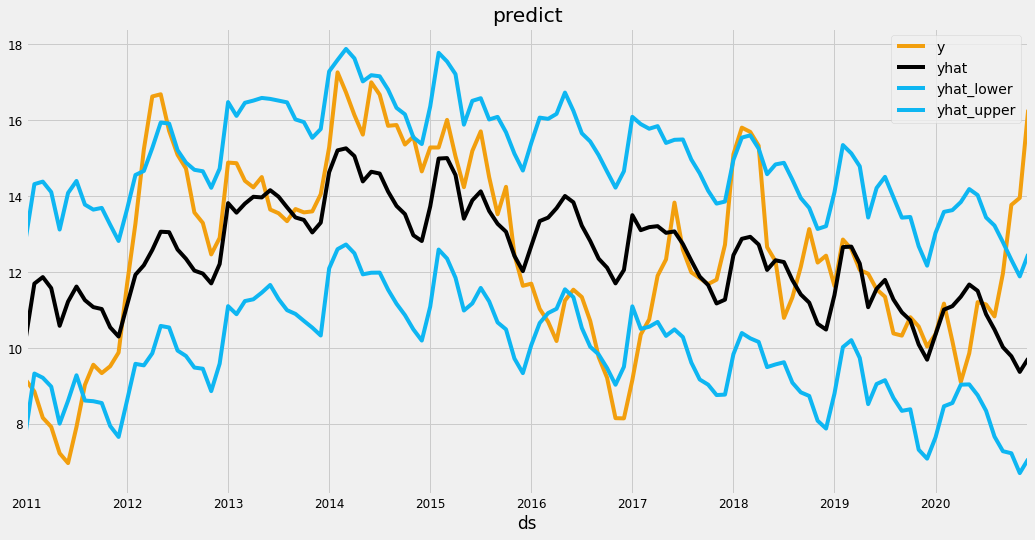

In [82]:
prophet_train_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(prophet_data, prophet_train_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), title= 'predict',color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

('y') là giá trị thật, ('yhat') là giá trị dự báo, ('yhat-lower' và 'yhat_upper') cung cấp sự không chắc chắn của dự báo


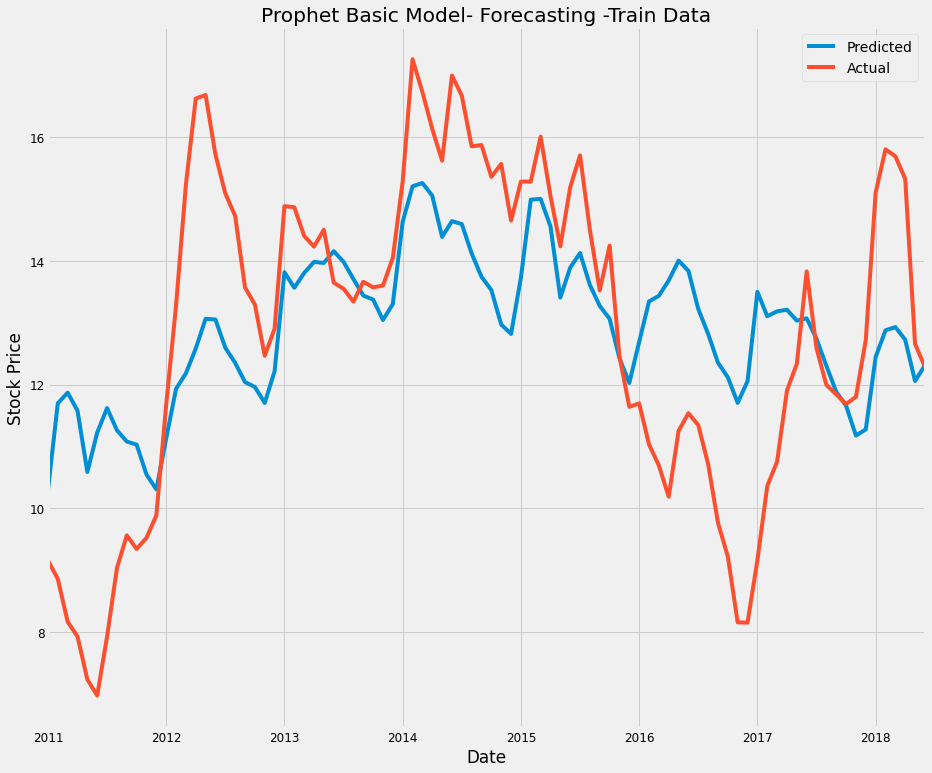

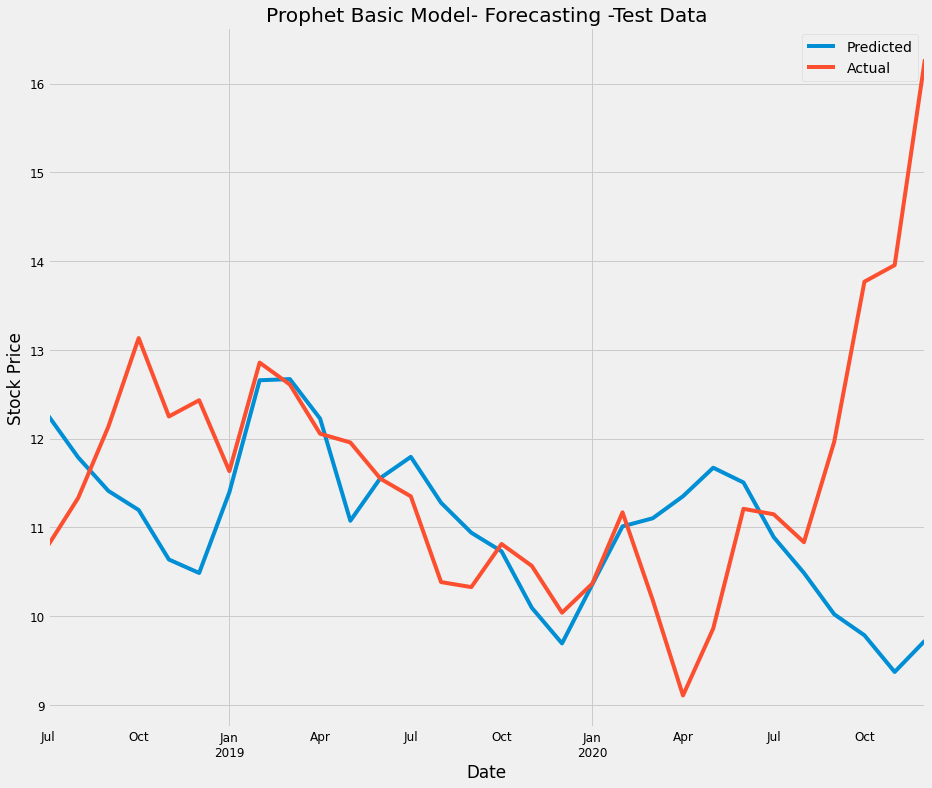

In [83]:
forecast.index = prophet_data['y'].index

prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']

fig = plt.figure(figsize=(14,12))
prophet_df['Predicted'][:90].plot(label='Predicted')
prophet_df['Actual'][:90].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

fig = plt.figure(figsize=(14,12))
prophet_df['Predicted'][90:].plot(label='Predicted')
prophet_df['Actual'][90:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

Result Metrics for Prophet Basic-Test Data
Mean Square Error :  3.622
Root Mean Squared Error :  1.903155274800246
Mean Absolute Error :  1.189
Mean Absolute Percentage Error 9.575


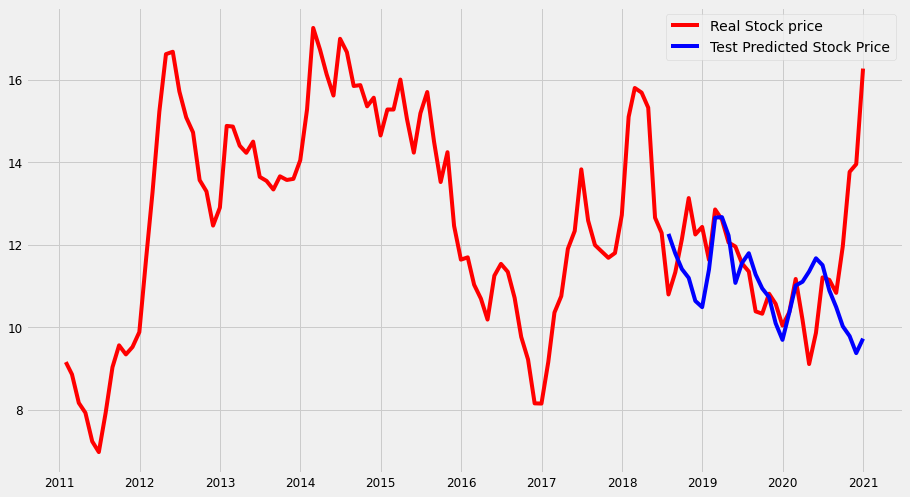

In [84]:
result_metrics_prophet = result_metrics(prophet_df['Actual'][90:],prophet_df['Predicted'][90:],'Prophet Basic-Test Data')

plt.figure(figsize=(14,8))
# plt.plot(prophet_df['Actual'][:90].index, prophet_df['Actual'][:90], color='green', label = 'Train Stock price')
# plt.plot(prophet_df['Predicted'][:90].index, prophet_df['Predicted'][:90], color='blue', label = 'Train Predicted Stock price')
# plt.plot(prophet_df['Actual'][90:].index, prophet_df['Actual'][90:], color='red', label='Real Stock Price')
plt.plot(modelling_series.index, modelling_series, color='red', label = 'Real Stock price')
plt.plot(prophet_df['Predicted'][90:].index, prophet_df['Predicted'][90:], color='blue', label='Test Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


# LSTM


Mạng nơ-ron hồi quy(Recurrent Neural Network - RNN). Đây là mạng nơ-ron nhân tạo được thiết kế cho việc xử lý các loại dữ liệu có dạng chuỗi tuần tự. Trong mạng RNN, trạng thái ẩn tại mỗi bước thời gian sẽ được tính toán dựa vào dữ liệu đầu vào tại bước thời gian tương ứng và các thông tin có được từ bước thời gian trước đó, tạo khả năng ghi nhớ các thông tin đã được tính toán ở những bước thời gian trước cho mạng. Gradient biến mất(Vanishing GradientProblem) và Gradient bùng nổ(Exploding Gradient Problem) là những vấn đề gặp phải khi sử dụng các kỹ thuật tối ưu hoá trọng số dựa trên gradient để huấn luyện mạng nơ-ron. Các vấn đề này thường gặp phải do việc lựa chọn các hàm kích hoạt không hợp lý hoặc số lượng các lớp ẩn của mạng quá lớn. Đặc biệt, các vấn đề này thường hay xuất hiện trong quá trình huấn luyện các mạng nơ-ron hồi quy. 

Tóm lại. RNN có thể mang thông tin từ state trước tới các state sau, rồi ở state cuối là sự kết hợp của tất cả các thông tin để dự đoán. Các state càng xa ở trước đó thì càng bị vanishing gradient và các hệ số không được update với các state ở xa do đó  thực tế là thông tin chỉ mang được qua một số lượng state nhất định, sau đó thì sẽ bị vanishing gradient, hay nói cách khác là model chỉ học được từ các state gần nó => short term memory. Vì vậy, ta cần một mô hình mới để giải quyết vấn đề này, vì vậy LSTM ra đời. Mạng LSTM chỉ ghi nhớ những thông tin liên quan, quan trọng trong việc dự đoán, còn các thông tin khác sẽ được bỏ đi.

Mạng LSTM cos thể gồm nhiều tế bào LSTM(LSTM memory cell) liên kết với nhau. Ý tưởng của LSTM là bổ sung thêm trạng thái bên trong tế bào(cell internal state) và ba cổng sàng lọc các thông tin đầu vào và đầu ra cho tế bào bao gồm forget gate, input gate, output gate.Tại mỗi bước thời gian t, các cổng lần lượt nhận giá trị đầu vào 𝑥𝑡 (đại diện cho một phần tử trong chuỗi đầu vào) và giá trị ℎ𝑡-1 có được từ đầu ra của các ô nhớ từ bước thời gian trước đó t – 1. Các cổng đều có chức năng sàng lọc thông tin với mỗi mục đích khác nhau. Các cổng được định nghĩa như sau:
- Forget gate: Có nhiệm vụ loại bỏ những thông tin không cần thiết nhận được khỏi cell internal state
- Input gate: Có nhiệm vụ chọn lọc những thông tin cần thiết nào được thêm vào cell internal state
- Output gate: Có nhiệm vụ xác định những thông tin nào từ cell internal state được sử dụng như đầu ra

In [103]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)

#Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

monthly_data = monthly_mean.to_frame()
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_data['Adj Close'] = scaler.fit_transform(monthly_data['Adj Close'].values.reshape(-1, 1)).flatten()

LSTM có khả năng ghi nhớ cao nhưng cũng rất nhạy cảm với cấu trúc của dữ liệu đầu vào vì sự phân tán và phạm vi rất rộng của dữ liệu thô gây , đặc biệt khi các hàm activation sigmoid hoặc tanh được sử dụng. Mô hình mạng sẽ được tối ưu và huấn luyện tốt nếu dữ liệu được co giãn phạm vi bằng việc được chuẩn hóa trong (0,1).

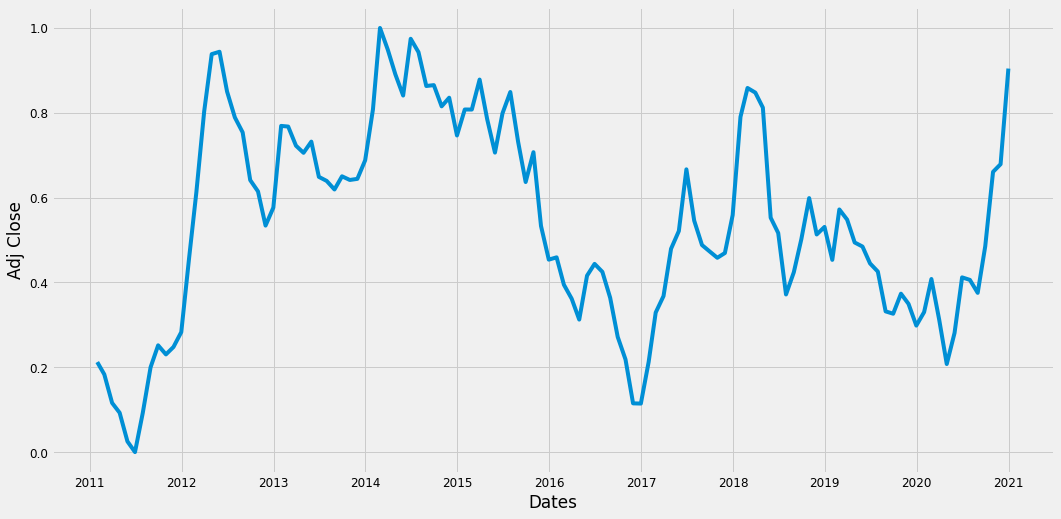

In [104]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Close')
plt.plot(monthly_data['Adj Close'])
plt.show()

Tiếp theo, chia train và test của chuỗi, dữ liệu train dùng để huấn luyện mô hình và test dùn để đánh giá mô hình dự đoán. Dữ liệu chuỗi thời gian khi chia train và test điều chú ý là phải giữ lại thứ tự các quan sát, vì thế ta chọn 0.75 các quan sát phần đầu cho dữ liệu train để xây dựng mô hình và 0.25 còn lại cho dữ liệu test để đánh giá mô hình.

In [105]:
train_size = int(len(monthly_data) * 0.75)
test_size = len(monthly_data) - train_size
train,test = split(monthly_data,train_size=0.75,shuffle=False)

print(len(train), len(test))

90 30


Tạo hàm để cấu hình dữ liệu. Hàm nhận hai đối số: tập dữ liệu, là mảng numpy mà chúng ta muốn chuyển đổi thành tập dữ liệu và look_back là số bước thời gian trước đó được sử dụng làm biến đầu vào để dự đoán khoản thời gian tiếp theo. Hàm sẽ tạo một tập dữ liệu trong đó dataX là tập gía trị cổ phiếu tại thời điểm xác định(t) và Y là giá cổ phiếu tại thời điểm tiếp theo (t+1)

In [106]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), 0].values
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [107]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



Reshape dữ liệu đầu vào LSTM theo dạng (samples, time_steps, features) bởi vị theo quy chuẩn của keras thì đầu vào của LSTM có dạng (batch_size, time_steps, feature). Batch size: Cứ hiểu là có bao nhiêu cặp (time_steps, feature) ấy time_steps: Như trình bày ở trên rồi feature: là có bao nhiêu thuộc tính của mỗi phần tử trong time_step. Ví dụ : time_step có 10 giá trị (mỗi giá trị là một vector), mỗi vector là một giá trị 2 chiều chẳng hạn, thì feature ở đây là 2 (tức 2 chiều đó ). Tóm lại, thì feature cứ hiểu là số thuộc tính của mỗi phần tử time_step. Còn reshape đầu ra mục đích là tí cho hợp với shape đầu ra của mô hình mạng. Ở trên ta thấy dùng 30 để đoán 1, nên đầu ra ở đây phải reshape theo (-1,1).

Hiện tại dữ liệu đang ở dạng (samples, features). Vì vậy ta sẽ chuyển đổi sang dạng (samples, time_steps, features) bằng reshape()

In [110]:
# reshape input to be [samples, time steps, features] which is required for LSTM
trainX =trainX.reshape(trainX.shape[0], 12, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 12, testX.shape[1])


Xây dựng mạng LSTM đầu tiên là khởi tạo lớp mô hình Sequential và thêm các lớp LSTM, Dropout và Dense cho mô hình này. Cuối cùng ta cho qua một tầng kết nối Dense với đầu ra là 1 chiều. epochs là số lượng phiên cập nhật trên toàn bộ dữ liệu, batch_size là lượng quan sát được sử dụng trong 1 phiên cập nhật, khai báo tham số shuffle là False nhằm vô hiệu hóa xáo trộn mẫu cho chuỗi thời gian và verbose = 0 để ẩn quá trình chạy model. Hàm mất mát được sử dụng trong mạng neuron này là mean_squared_error cập nhật bởi thuật toán Adam.

In [111]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')
history =  model.fit( trainX,trainY, validation_data = (testX,testY), epochs = 100 , batch_size = 1, verbose = 2, shuffle = False)
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, shuffle = False)

Epoch 1/100
77/77 - 6s - loss: 0.0827 - val_loss: 0.0205
Epoch 2/100
77/77 - 1s - loss: 0.0617 - val_loss: 0.0189
Epoch 3/100
77/77 - 1s - loss: 0.0577 - val_loss: 0.0150
Epoch 4/100
77/77 - 1s - loss: 0.0498 - val_loss: 0.0142
Epoch 5/100
77/77 - 0s - loss: 0.0534 - val_loss: 0.0144
Epoch 6/100
77/77 - 0s - loss: 0.0444 - val_loss: 0.0133
Epoch 7/100
77/77 - 1s - loss: 0.0416 - val_loss: 0.0139
Epoch 8/100
77/77 - 1s - loss: 0.0493 - val_loss: 0.0122
Epoch 9/100
77/77 - 0s - loss: 0.0343 - val_loss: 0.0122
Epoch 10/100
77/77 - 0s - loss: 0.0452 - val_loss: 0.0120
Epoch 11/100
77/77 - 1s - loss: 0.0398 - val_loss: 0.0127
Epoch 12/100
77/77 - 0s - loss: 0.0352 - val_loss: 0.0115
Epoch 13/100
77/77 - 0s - loss: 0.0407 - val_loss: 0.0103
Epoch 14/100
77/77 - 1s - loss: 0.0277 - val_loss: 0.0099
Epoch 15/100
77/77 - 1s - loss: 0.0322 - val_loss: 0.0086
Epoch 16/100
77/77 - 0s - loss: 0.0287 - val_loss: 0.0088
Epoch 17/100
77/77 - 0s - loss: 0.0347 - val_loss: 0.0075
Epoch 18/100
77/77 - 1s

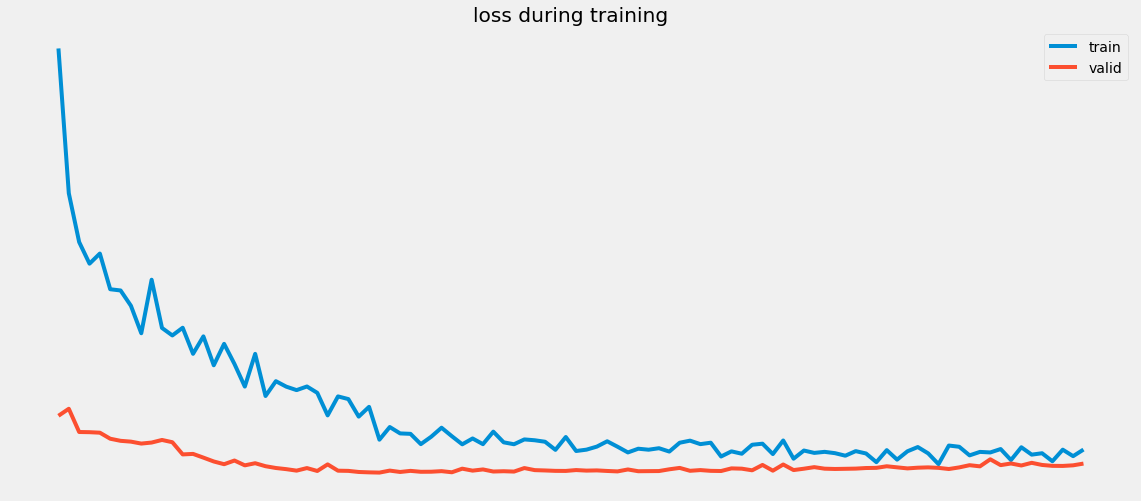

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

Sau khi dự đoán xong thì chúng ta thực hiện inverse transform trainX và testX để đưa về kết quả thực vì trước đã chuẩn hóa chúng nằm trong (0,1). Đồng thời, đưa ra các sai số giữa kết quả thực tế và dự đoán.

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('R2 Score : ',round(r2_score(testY[0],testPredict[:,0]),3))
# print('Mean Squared Error : ',round(mean_squared_error(testY[0],testPredict[:,0]),3))
# print('Mean Absolute Error : ',round(mean_absolute_error(testY[0],testPredict[:,0]),3))
# print('Mean Absolute Percentage Error',round(mean_absolute_percentage_error(testY[0],testPredict[:,0]),3))
result_metrics_lstm = result_metrics(testY[0],testPredict[:,0],"LSTM test data")

Result Metrics for LSTM test data
Mean Square Error :  0.828
Root Mean Squared Error :  0.909945053286186
Mean Absolute Error :  0.815
Mean Absolute Percentage Error 7.488


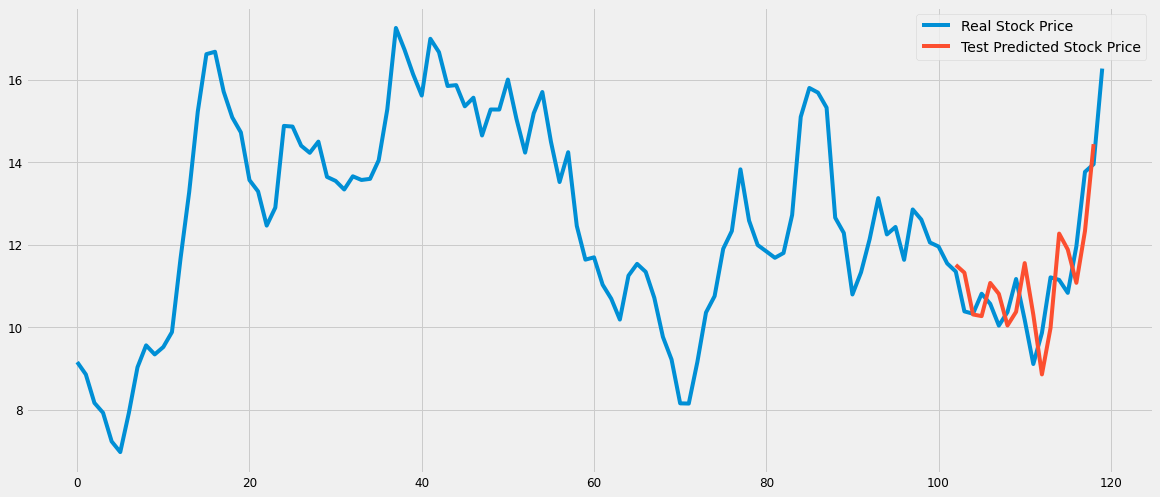

In [38]:
trainPredictPlot = np.empty_like(monthly_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(monthly_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(monthly_data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(monthly_data), label='Real Stock Price')
plt.plot(testPredictPlot, label='Test Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
listmetrics = []
listmetrics.extend(['Mean Square Error','Root Mean Squared Error','Mean Absolute Error','Mean Absolute Percentage Error'])
myTable = PrettyTable(["Metrics", "Sarima", "Prophet", "Lstm"])
for i in range(len(result_metrics_sarima)):
    myTable.add_row([listmetrics[i], result_metrics_sarima[i], result_metrics_prophet[i], result_metrics_lstm[i]])
    
print(myTable)

+--------------------------------+--------------------+-------------------+-------------------+
|            Metrics             |       Sarima       |      Prophet      |        Lstm       |
+--------------------------------+--------------------+-------------------+-------------------+
|       Mean Square Error        |       1.669        |       3.622       |       0.828       |
|    Root Mean Squared Error     | 1.2918978287774927 | 1.903155274800246 | 0.909945053286186 |
|      Mean Absolute Error       |       0.791        |       1.189       |       0.815       |
| Mean Absolute Percentage Error |       6.405        |       9.575       |       7.488       |
+--------------------------------+--------------------+-------------------+-------------------+
